# TM10007 Assignment ECG - group 3

### Imports

In [100]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest, chi2, SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from itertools import combinations
from scipy.stats import ttest_rel


### Data loading, save features and labels into dataframe 

In [101]:
with zipfile.ZipFile('./ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./ecg/')

data = pd.read_csv('./ecg/ecg_data.csv', index_col=0)

file = './ecg/ecg_data.csv'
if(os.path.exists(file) and os.path.isfile(file)):
  os.remove(file)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

y = data.label
X = data.drop('label', axis=1)

The number of samples: 827
The number of columns: 9001


## PCA plot to visualize data

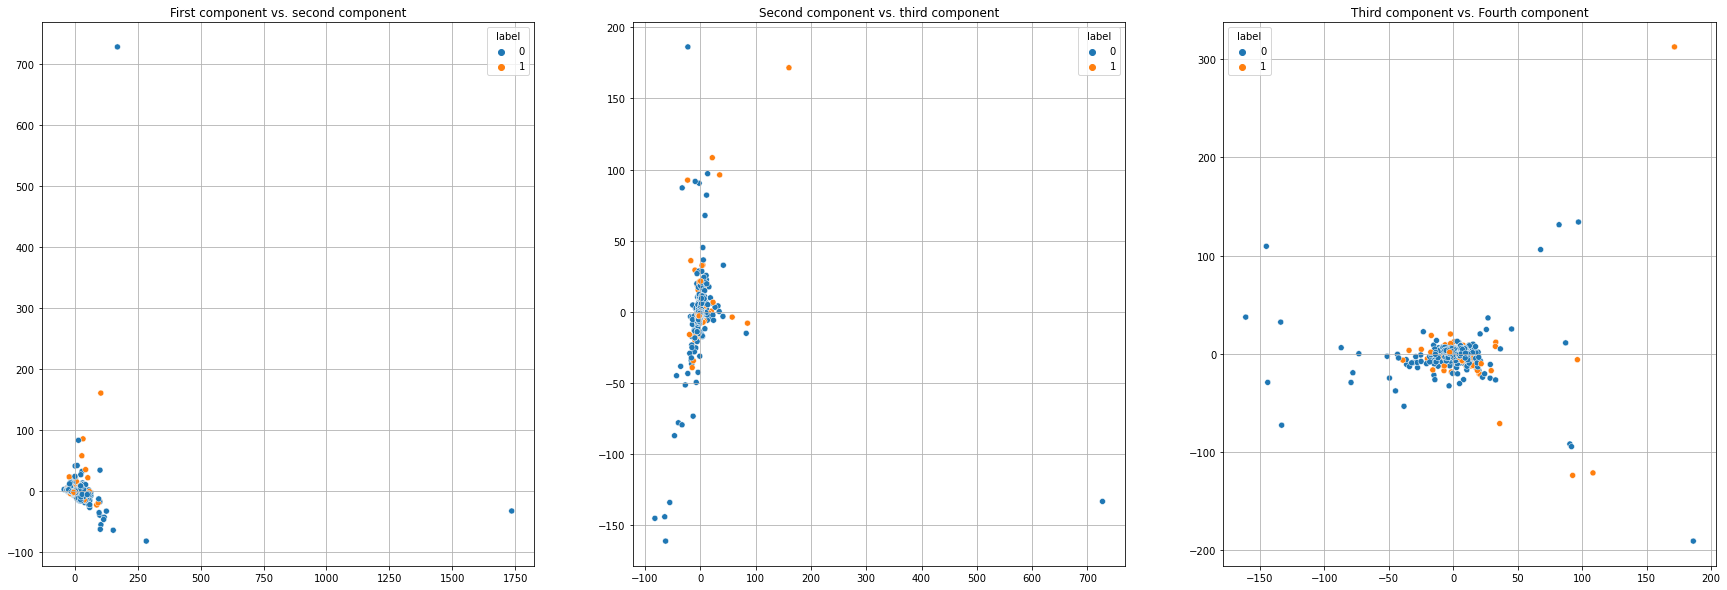

In [5]:
# PCA plot of all data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# we dachten PCA scatterplots van verschillende data toevoegen in subplot 
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

fig, axs = plt.subplots(1, 3, figsize=(30,10))
seaborn.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, ax=axs[0])
axs[0].set_title('First component vs. second component')
axs[0].grid()
seaborn.scatterplot(x=X_pca[:, 1], y=X_pca[:, 2], hue=y, ax=axs[1])
axs[1].set_title('Second component vs. third component')
axs[1].grid()
seaborn.scatterplot(x=X_pca[:, 2], y=X_pca[:, 3], hue=y, ax=axs[2])
axs[2].set_title('Third component vs. Fourth component')
axs[2].grid()

(0.0, 75.0)

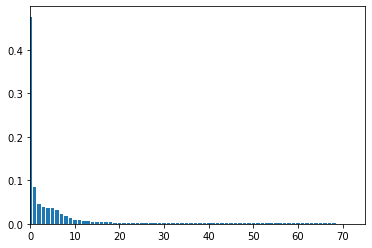

In [40]:
plt.bar(x=range(pca.explained_variance_ratio_.shape[0]), height=pca.explained_variance_ratio_)
plt.xlim([0, 75])

In [38]:
pca.explained_variance_ratio_.shape[0]

827

### Learning Curve function 

In [39]:
def plot_learning_curve(clf, X_train, y_train, plot):
    train_size, train_scores, test_scores = learning_curve(clf, X_train, y_train, verbose=2, scoring='roc_auc')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plot.plot(train_size, train_mean, color='b', label='training')
    plot.plot(train_size, test_mean, color='orange', label='validation')

    plot.fill_between(train_size, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
    plot.fill_between(train_size, test_mean-test_std, test_mean+test_std, color='orange', alpha=0.3)
    
    plot.grid()
    plot.set_ylim([0.5, 1.1])
    plot.set_xlabel('Training examples')
    plot.set_ylabel('ROC-AUC Score')
    plot.legend()

# Constants

In [102]:
N_SPLITS = 5 # number of splits for outer validation loop
RANDOM_SEED = 42 # get reproducable splits for the different models

# Random forest classifier 

### Loop of test-training  and evaluation loop

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.8s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.8s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.8s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_leaf=5, random_forest__n_estimators=80; total time=   1.1s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.8s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   21.7s finished


[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   1.0s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.7s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   1.1s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_leaf=5, random_forest__n_estimators=80; total time=   1.1s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   1.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   22.6s finished


[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.7s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.7s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.8s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_leaf=5, random_forest__n_estimators=80; total time=   1.1s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   22.4s finished


[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.9s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.8s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.7s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_leaf=5, random_forest__n_estimators=80; total time=   0.9s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.9s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   24.1s finished


[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.8s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.7s
[CV] END pca__n_components=1, random_forest__bootstrap=True, random_forest__max_depth=30, random_forest__max_features=sqrt, random_forest__min_samples_leaf=1, random_forest__n_estimators=187; total time=   0.7s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_leaf=5, random_forest__n_estimators=80; total time=   1.0s
[CV] END pca__n_components=None, random_forest__bootstrap=True, random_forest__max_depth=20, random_forest__max_features=sqrt, random_forest__min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.5s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.8s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   26.0s finished


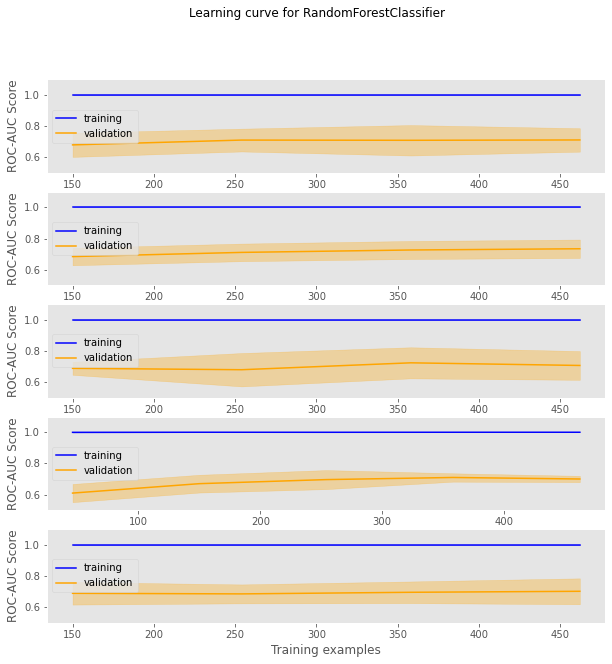

In [103]:
rs = StratifiedShuffleSplit(n_splits=N_SPLITS, test_size=.3, random_state=RANDOM_SEED)

scores_rf = {'f1': [], 'accuracy': [], 'AUC': []}
fitted_clf_list_rf = []

fig, axs = plt.subplots(N_SPLITS, figsize=(10, 10))

for i, (train_index, test_index) in enumerate(rs.split(X, y)):

    # Data split
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

    # Preprocessing
    scaler = StandardScaler()
    random_forest = RandomForestClassifier()
    pca = PCA()

    # Pipeline
    pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ("random_forest", random_forest)])

    # GridSearch

    # Random grid:
    pca_components = [None] + list(np.arange(1, 101, 20))
    n_estimators = [int(x) for x in np.linspace(start=50, stop=200)]
    max_features = ['auto', 'sqrt', 'log2', 0.1]
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
    min_samples_leaf = [1, 3, 5]
    bootstrap = [True, False]

    random_grid = {'random_forest__n_estimators': n_estimators,
    'random_forest__max_features': max_features,
    'random_forest__max_depth': max_depth,
    'random_forest__min_samples_leaf': min_samples_leaf,
    'random_forest__bootstrap': bootstrap,
    'pca__n_components': pca_components}
 
    search = RandomizedSearchCV(pipe, random_grid, cv=3, scoring = 'f1', verbose=2, n_iter=20, random_state=RANDOM_SEED)
    search.fit(X_train, y_train)
    best_clf = search.best_estimator_
    fitted_clf_list_rf.append(search)


    # Evaluation
    y_pred = best_clf.predict(X_test)
    y_score = best_clf.predict_proba(X_test)
    scores_rf['f1'] += [f1_score(y_test, y_pred)]
    scores_rf['accuracy'] += [accuracy_score(y_test, y_pred)]
    scores_rf['AUC'] += [roc_auc_score(y_test, y_score)]

    # Predictions
    scores_rf[f'probs_split_{i+1}'] = y_score
    scores_rf[f'labels_split_{i+1}'] = list(y_test)
    
    plot_learning_curve(best_clf, X_train, y_train, axs[i])
    fig.suptitle(f'Learning curve for {str(type(best_clf[-1])).split(".")[-1][:-2]}')
plt.show()

### Results - Overall metrics

In [54]:
print('F1-scores:')
print(f"{scores_rf['f1']}, mean: {np.mean(scores_rf['f1'])}")
print('Accuracy:')
print(f"{scores_rf['accuracy']}, mean: {np.mean(scores_rf['accuracy'])}")
print('AUC:')
print(f"{scores_rf['AUC']}, mean: {np.mean(scores_rf['AUC'])}")

F1-scores:
[0.25925925925925924, 0.37931034482758624, 0.18518518518518517, 0.1923076923076923, 0.22222222222222218], mean: 0.24765694076038902
Accuracy:
[0.8393574297188755, 0.8554216867469879, 0.8232931726907631, 0.8313253012048193, 0.8313253012048193], mean: 0.8361445783132531
AUC:
[0.5722283813747229, 0.6176829268292683, 0.5446230598669622, 0.54950110864745, 0.5584257206208425], mean: 0.5684922394678491


### Results - Hyperparameter search

In [55]:
import pandas as pd
for i, clf in enumerate(fitted_clf_list_rf): 
    print(f'Results for split {i+1}:')
    param_df = pd.DataFrame(clf.cv_results_)

    # columns to drop from dataframe:
    param_df = param_df.drop(['std_fit_time', 'mean_score_time', 'std_score_time'], axis=1)
    cols = [c for c in param_df.columns if c.lower()[:5] != 'split']
    
    param_df = param_df[cols].sort_values(by='rank_test_score')
    display(param_df.head(5))

Results for split 1:


,mean_fit_time,param_random_forest__n_estimators,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,param_random_forest__bootstrap,param_pca__n_components,params,mean_test_score,std_test_score,rank_test_score
14,0.867125,163,1,auto,20,True,21,"{'random_forest__n_estimators': 163, 'random_f...",0.359867,0.060743,1
7,0.668421,105,5,auto,120,True,21,"{'random_forest__n_estimators': 105, 'random_f...",0.357749,0.073007,2
2,0.799038,169,1,auto,80,True,21,"{'random_forest__n_estimators': 169, 'random_f...",0.357559,0.077795,3
9,0.700091,129,3,sqrt,120,True,21,"{'random_forest__n_estimators': 129, 'random_f...",0.340698,0.065137,4
10,0.811009,181,5,sqrt,50,True,21,"{'random_forest__n_estimators': 181, 'random_f...",0.332399,0.090623,5


Results for split 2:


,mean_fit_time,param_random_forest__n_estimators,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,param_random_forest__bootstrap,param_pca__n_components,params,mean_test_score,std_test_score,rank_test_score
1,0.789366,117,1,log2,70,False,21,"{'random_forest__n_estimators': 117, 'random_f...",0.249753,0.016557,1
18,0.650245,62,3,0.1,40,False,41,"{'random_forest__n_estimators': 62, 'random_fo...",0.224676,0.106382,2
13,1.133256,200,1,log2,30,False,81,"{'random_forest__n_estimators': 200, 'random_f...",0.224229,0.113110,3
11,0.909304,193,1,0.1,80,False,41,"{'random_forest__n_estimators': 193, 'random_f...",0.214330,0.097634,4
10,2.196662,92,1,0.1,20,False,None,"{'random_forest__n_estimators': 92, 'random_fo...",0.210262,0.100668,5


Results for split 3:


,mean_fit_time,param_random_forest__n_estimators,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,param_random_forest__bootstrap,param_pca__n_components,params,mean_test_score,std_test_score,rank_test_score
19,1.173140,187,3,auto,80,False,41,"{'random_forest__n_estimators': 187, 'random_f...",0.290995,0.044495,1
13,1.112853,151,1,0.1,30,False,81,"{'random_forest__n_estimators': 151, 'random_f...",0.288584,0.103296,2
18,1.056847,147,1,log2,20,False,61,"{'random_forest__n_estimators': 147, 'random_f...",0.288325,0.066972,3
0,0.920448,135,3,sqrt,80,False,41,"{'random_forest__n_estimators': 135, 'random_f...",0.283086,0.032091,4
1,0.648569,65,3,0.1,90,False,41,"{'random_forest__n_estimators': 65, 'random_fo...",0.281717,0.059238,5


Results for split 4:


,mean_fit_time,param_random_forest__n_estimators,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,param_random_forest__bootstrap,param_pca__n_components,params,mean_test_score,std_test_score,rank_test_score
13,0.915142,126,5,auto,120,False,21,"{'random_forest__n_estimators': 126, 'random_f...",0.380387,0.090143,1
4,0.699150,92,3,auto,40,True,21,"{'random_forest__n_estimators': 92, 'random_fo...",0.367881,0.111681,2
19,0.740406,65,1,auto,40,False,41,"{'random_forest__n_estimators': 65, 'random_fo...",0.349748,0.058420,3
8,0.938528,200,1,sqrt,60,True,21,"{'random_forest__n_estimators': 200, 'random_f...",0.343133,0.074358,4
17,0.991398,123,3,sqrt,110,False,41,"{'random_forest__n_estimators': 123, 'random_f...",0.339079,0.080160,5


Results for split 5:


,mean_fit_time,param_random_forest__n_estimators,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,param_random_forest__bootstrap,param_pca__n_components,params,mean_test_score,std_test_score,rank_test_score
5,0.895888,160,1,sqrt,90,False,21,"{'random_forest__n_estimators': 160, 'random_f...",0.247512,0.035838,1
13,0.905429,166,3,log2,50,False,21,"{'random_forest__n_estimators': 166, 'random_f...",0.227519,0.020721,2
7,1.175133,193,3,0.1,110,False,61,"{'random_forest__n_estimators': 193, 'random_f...",0.209757,0.021499,3
0,0.600102,98,1,log2,50,False,1,"{'random_forest__n_estimators': 98, 'random_fo...",0.191758,0.041804,4
18,0.622045,105,1,0.1,120,False,1,"{'random_forest__n_estimators': 105, 'random_f...",0.191758,0.041804,4


# Naive Bayes

#### Training-Testing using k-best feature selection

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.2s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.4s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.4s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.4s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.4s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.3s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   12.0s finished


[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.4s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.2s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.3s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.4s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.4s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.2s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.3s
[CV] END nbayes__var_smoothing=6.57933224657568

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.9s finished


[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.3s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.3s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.3s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.3s
[CV] END nbayes__var_smoothing=6.57933224657568

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.8s finished


[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.3s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.4s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.4s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.4s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.2s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.4s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.2s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.2s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.3s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.4s
[CV] END nbayes__var_smoothing=6.57933224657568

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.6s finished


[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.4s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.2s
[CV] END nbayes__var_smoothing=3.511191734215127e-05, select__k=20; total time=   0.4s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.2s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.2s
[CV] END nbayes__var_smoothing=0.3511191734215131, select__k=122; total time=   0.3s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.5s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.5s
[CV] END nbayes__var_smoothing=0.0005336699231206307, select__k=64; total time=   0.4s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.4s
[CV] END nbayes__var_smoothing=6.579332246575682e-09, select__k=100; total time=   0.3s
[CV] END nbayes__var_smoothing=6.57933224657568

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.3s finished


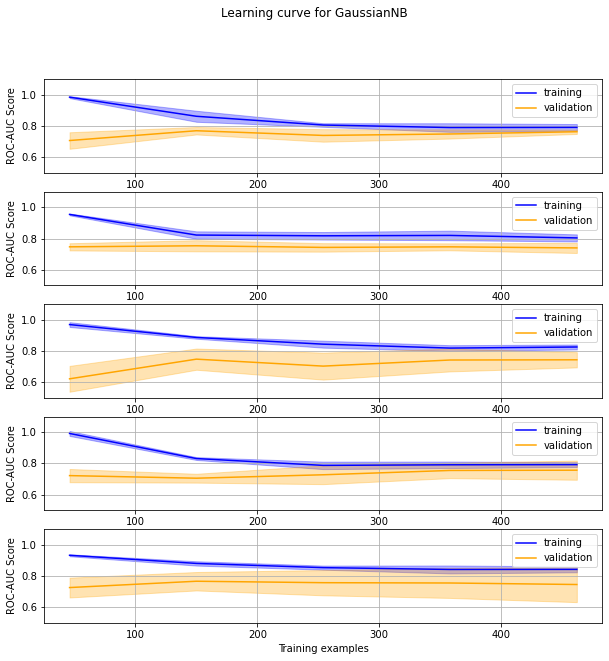

In [48]:
rs = StratifiedShuffleSplit(n_splits=N_SPLITS, test_size=.3, random_state=RANDOM_SEED)

scores_nb = {'f1': [], 'accuracy': [], 'AUC': []}
fitted_clf_list_nb = []

fig, axs = plt.subplots(N_SPLITS, figsize=(10, 10))

for i, (train_index, test_index) in enumerate(rs.split(X, y)):

    # Data split
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

    # Preprocessing
    scaler = StandardScaler()
    naive_bayes = GaussianNB()
    pca = PCA()
    selector = SelectKBest()

    # Pipeline
    pipe = Pipeline(steps=[('select', selector), ("nbayes", naive_bayes)])

    # Random grid:
    pca_components = [None] + list(np.arange(1, 101, 20))
    var_smoothing = np.logspace(0,-9, num=100)
    k_select = np.arange(2, 150)

    random_grid = {'nbayes__var_smoothing': var_smoothing,
    #'pca__n_components': pca_components}
    'select__k': k_select}

    search = RandomizedSearchCV(pipe, random_grid, cv=3, scoring = 'f1', verbose=2, n_iter= 20, random_state=RANDOM_SEED)
    search.fit(X_train, y_train)
    best_clf = search.best_estimator_
    fitted_clf_list_nb.append(search)

    # Evaluation
    y_pred = best_clf.predict(X_test)
    y_score = best_clf.predict_proba(X_test)
    scores_nb['f1'] += [f1_score(y_test, y_pred)]
    scores_nb['accuracy'] += [accuracy_score(y_test, y_pred)]
    scores_nb['AUC'] += [roc_auc_score(y_test, y_score)]

    # Predictions
    scores_nb[f'probs_split_{i+1}'] = y_score
    scores_nb[f'labels_split_{i+1}'] = list(y_test)
    
    plot_learning_curve(best_clf, X_train, y_train, axs[i])
    fig.suptitle(f'Learning curve for {str(type(best_clf[-1])).split(".")[-1][:-2]}')
plt.show()

#### Training-Testing using Standard Scaler and PCA (hidden)
Performance for this pipeline was less compared to using the k-best feature selection (above).

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END nbayes__var_smoothing=0.15199110829529336, select__k=13; total time=   0.1s
[CV] END nbayes__var_smoothing=0.15199110829529336, select__k=13; total time=   0.2s
[CV] END nbayes__var_smoothing=0.15199110829529336, select__k=13; total time=   0.3s
[CV] END nbayes__var_smoothing=0.008111308307896872, select__k=57; total time=   0.3s
[CV] END nbayes__var_smoothing=0.008111308307896872, select__k=57; total time=   0.2s
[CV] END nbayes__var_smoothing=0.008111308307896872, select__k=57; total time=   0.2s
[CV] END nbayes__var_smoothing=4.328761281083061e-09, select__k=21; total time=   0.2s
[CV] END nbayes__var_smoothing=4.328761281083061e-09, select__k=21; total time=   0.3s
[CV] END nbayes__var_smoothing=4.328761281083061e-09, select__k=21; total time=   0.1s
[CV] END nbayes__var_smoothing=8.111308307896873e-08, select__k=99; total time=   0.1s
[CV] END nbayes__var_smoothing=8.111308307896873e-08, select__k=99; total time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.0s finished


[CV] END nbayes__var_smoothing=0.12328467394420659, select__k=28; total time=   0.2s
[CV] END nbayes__var_smoothing=0.12328467394420659, select__k=28; total time=   0.1s
[CV] END nbayes__var_smoothing=0.12328467394420659, select__k=28; total time=   0.2s
[CV] END nbayes__var_smoothing=0.0002310129700083158, select__k=5; total time=   0.1s
[CV] END nbayes__var_smoothing=0.0002310129700083158, select__k=5; total time=   0.2s
[CV] END nbayes__var_smoothing=0.0002310129700083158, select__k=5; total time=   0.2s
[CV] END nbayes__var_smoothing=2.848035868435799e-05, select__k=99; total time=   0.2s
[CV] END nbayes__var_smoothing=2.848035868435799e-05, select__k=99; total time=   0.2s
[CV] END nbayes__var_smoothing=2.848035868435799e-05, select__k=99; total time=   0.2s
[CV] END nbayes__var_smoothing=1.519911082952933e-07, select__k=7; total time=   0.1s
[CV] END nbayes__var_smoothing=1.519911082952933e-07, select__k=7; total time=   0.2s
[CV] END nbayes__var_smoothing=1.519911082952933e-07, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.5s finished


[CV] END nbayes__var_smoothing=6.579332246575682e-07, select__k=14; total time=   0.2s
[CV] END nbayes__var_smoothing=6.579332246575682e-07, select__k=14; total time=   0.1s
[CV] END nbayes__var_smoothing=6.579332246575682e-07, select__k=14; total time=   0.2s
[CV] END nbayes__var_smoothing=3.5111917342151277e-07, select__k=39; total time=   0.1s
[CV] END nbayes__var_smoothing=3.5111917342151277e-07, select__k=39; total time=   0.2s
[CV] END nbayes__var_smoothing=3.5111917342151277e-07, select__k=39; total time=   0.1s
[CV] END .........nbayes__var_smoothing=1e-06, select__k=112; total time=   0.3s
[CV] END .........nbayes__var_smoothing=1e-06, select__k=112; total time=   0.2s
[CV] END .........nbayes__var_smoothing=1e-06, select__k=112; total time=   0.1s
[CV] END nbayes__var_smoothing=0.02848035868435802, select__k=16; total time=   0.2s
[CV] END nbayes__var_smoothing=0.02848035868435802, select__k=16; total time=   0.2s
[CV] END nbayes__var_smoothing=0.02848035868435802, select__k=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    7.6s finished


[CV] END nbayes__var_smoothing=0.0657933224657568, select__k=17; total time=   0.1s
[CV] END nbayes__var_smoothing=0.0657933224657568, select__k=17; total time=   0.1s
[CV] END nbayes__var_smoothing=0.0657933224657568, select__k=17; total time=   0.1s
[CV] END ...........nbayes__var_smoothing=0.01, select__k=63; total time=   0.1s
[CV] END ...........nbayes__var_smoothing=0.01, select__k=63; total time=   0.1s
[CV] END ...........nbayes__var_smoothing=0.01, select__k=63; total time=   0.1s
[CV] END nbayes__var_smoothing=3.5111917342151277e-08, select__k=88; total time=   0.1s
[CV] END nbayes__var_smoothing=3.5111917342151277e-08, select__k=88; total time=   0.1s
[CV] END nbayes__var_smoothing=3.5111917342151277e-08, select__k=88; total time=   0.1s
[CV] END nbayes__var_smoothing=5.336699231206313e-06, select__k=54; total time=   0.2s
[CV] END nbayes__var_smoothing=5.336699231206313e-06, select__k=54; total time=   0.1s
[CV] END nbayes__var_smoothing=5.336699231206313e-06, select__k=54;

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.0s finished


[CV] END nbayes__var_smoothing=6.579332246575683e-06, select__k=149; total time=   0.1s
[CV] END nbayes__var_smoothing=6.579332246575683e-06, select__k=149; total time=   0.2s
[CV] END nbayes__var_smoothing=6.579332246575683e-06, select__k=149; total time=   0.1s
[CV] END nbayes__var_smoothing=8.111308307896873e-06, select__k=108; total time=   0.1s
[CV] END nbayes__var_smoothing=8.111308307896873e-06, select__k=108; total time=   0.2s
[CV] END nbayes__var_smoothing=8.111308307896873e-06, select__k=108; total time=   0.1s
[CV] END nbayes__var_smoothing=0.23101297000831597, select__k=51; total time=   0.1s
[CV] END nbayes__var_smoothing=0.23101297000831597, select__k=51; total time=   0.1s
[CV] END nbayes__var_smoothing=0.23101297000831597, select__k=51; total time=   0.1s
[CV] END nbayes__var_smoothing=1.873817422860383e-07, select__k=137; total time=   0.1s
[CV] END nbayes__var_smoothing=1.873817422860383e-07, select__k=137; total time=   0.1s
[CV] END nbayes__var_smoothing=1.87381742

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.3s finished


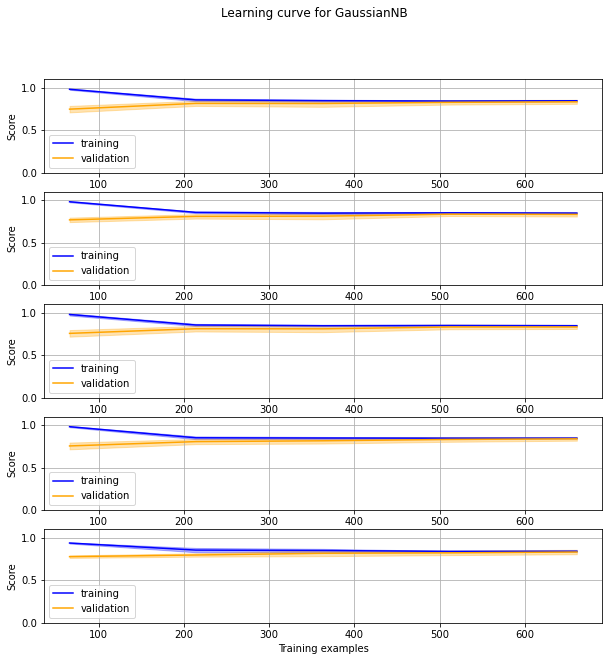

In [61]:
rs = StratifiedShuffleSplit(n_splits=N_SPLITS, test_size=.3, random_state=RANDOM_SEED)

scores_nb = {'f1': [], 'accuracy': [], 'AUC': []}
fitted_clf_list_nb = []

fig, axs = plt.subplots(N_SPLITS, figsize=(10, 10))

for i, (train_index, test_index) in enumerate(rs.split(X, y)):

    # Data split
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

    # Preprocessing
    scaler = StandardScaler()
    naive_bayes = GaussianNB()
    pca = PCA()

    # Pipeline
    pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ("nbayes", naive_bayes)])

    # Random grid:
    pca_components = [None] + list(np.arange(1, 101, 20))
    var_smoothing = np.logspace(0,-9, num=100)
    k_select = np.arange(2, 150)

    random_grid = {'nbayes__var_smoothing': var_smoothing,
    #'pca__n_components': pca_components}
    'select__k': k_select}

    search = RandomizedSearchCV(pipe, random_grid, cv=3, scoring = 'f1', verbose=2, n_iter= 20, random_state=RANDOM_SEED)
    search.fit(X_train, y_train)
    best_clf = search.best_estimator_
    fitted_clf_list_nb.append(search)

    # Evaluation
    y_pred = best_clf.predict(X_test)
    scores_nb['f1'] += [f1_score(y_test, y_pred)]
    scores_nb['accuracy'] += [accuracy_score(y_test, y_pred)]
    scores_nb['AUC'] += [roc_auc_score(y_test, y_pred)]
    
    plot_learning_curve(best_clf, X_train, y_train, axs[i])
    fig.suptitle(f'Learning curve for {str(type(best_clf[-1])).split(".")[-1][:-2]}')
plt.show()

### Results - Overall metrics

In [41]:
print('F1-scores:')
print(f"{scores_nb['f1']}, mean: {np.mean(scores_nb['f1'])}")
print('Accuracy:')
print(f"{scores_nb['accuracy']}, mean: {np.mean(scores_nb['accuracy'])}")
print('AUC:')
print(f"{scores_nb['AUC']}, mean: {np.mean(scores_nb['AUC'])}")

F1-scores:
[0.29333333333333333, 0.39473684210526316, 0.3384615384615385, 0.44444444444444453, 0.3835616438356164], mean: 0.3709075604360392
Accuracy:
[0.7871485943775101, 0.8152610441767069, 0.8273092369477911, 0.8192771084337349, 0.8192771084337349], mean: 0.8136546184738955
AUC:
[0.576219512195122, 0.6289911308203991, 0.600609756097561, 0.6582039911308204, 0.6225055432372505], mean: 0.6173059866962306


### Results - Hyperparameter search

In [63]:
import pandas as pd
for i, clf in enumerate(fitted_clf_list_nb): 
    print(f'Results for split {i+1}:')
    param_df = pd.DataFrame(clf.cv_results_)

    # columns to drop from dataframe:
    param_df = param_df.drop(['std_fit_time', 'mean_score_time', 'std_score_time'], axis=1)
    cols = [c for c in param_df.columns if c.lower()[:5] != 'split']
    
    param_df = param_df[cols].sort_values(by='rank_test_score')
    display(param_df.head(5))

Results for split 1:


,mean_fit_time,param_select__k,param_nbayes__var_smoothing,params,mean_test_score,std_test_score,rank_test_score
7,0.272218,36,0.000231,"{'select__k': 36, 'nbayes__var_smoothing': 0.0...",0.544729,0.044237,1
2,0.243623,21,0.0,"{'select__k': 21, 'nbayes__var_smoothing': 4.3...",0.532422,0.014376,2
1,0.274160,57,0.008111,"{'select__k': 57, 'nbayes__var_smoothing': 0.0...",0.514545,0.048310,3
9,0.218120,109,0.000534,"{'select__k': 109, 'nbayes__var_smoothing': 0....",0.513580,0.056197,4
5,0.206880,106,0.000658,"{'select__k': 106, 'nbayes__var_smoothing': 0....",0.510662,0.057986,5


Results for split 2:


,mean_fit_time,param_select__k,param_nbayes__var_smoothing,params,mean_test_score,std_test_score,rank_test_score
8,0.246713,57,0.003511,"{'select__k': 57, 'nbayes__var_smoothing': 0.0...",0.454409,0.060624,1
9,0.214434,38,0.0,"{'select__k': 38, 'nbayes__var_smoothing': 1.5...",0.451502,0.041341,2
18,0.218064,37,0.000002,"{'select__k': 37, 'nbayes__var_smoothing': 1.8...",0.435824,0.030806,3
10,0.212662,61,0.001874,"{'select__k': 61, 'nbayes__var_smoothing': 0.0...",0.435673,0.062576,4
17,0.205670,15,0.0,"{'select__k': 15, 'nbayes__var_smoothing': 6.5...",0.431604,0.021613,5


Results for split 3:


,mean_fit_time,param_select__k,param_nbayes__var_smoothing,params,mean_test_score,std_test_score,rank_test_score
4,0.219417,42,0.000066,"{'select__k': 42, 'nbayes__var_smoothing': 6.5...",0.437162,0.060250,1
13,0.189834,39,0.00152,"{'select__k': 39, 'nbayes__var_smoothing': 0.0...",0.419302,0.071941,2
1,0.203633,39,0.0,"{'select__k': 39, 'nbayes__var_smoothing': 3.5...",0.416949,0.073930,3
11,0.245018,101,0.000187,"{'select__k': 101, 'nbayes__var_smoothing': 0....",0.414103,0.055299,4
9,0.187191,58,0.0,"{'select__k': 58, 'nbayes__var_smoothing': 3.5...",0.410745,0.076149,5


Results for split 4:


,mean_fit_time,param_select__k,param_nbayes__var_smoothing,params,mean_test_score,std_test_score,rank_test_score
14,0.192283,32,0.000002,"{'select__k': 32, 'nbayes__var_smoothing': 1.8...",0.460954,0.053988,1
16,0.190156,56,0.000001,"{'select__k': 56, 'nbayes__var_smoothing': 1e-06}",0.450683,0.059493,2
9,0.188175,52,0.023101,"{'select__k': 52, 'nbayes__var_smoothing': 0.0...",0.447066,0.027569,3
3,0.200142,54,0.000005,"{'select__k': 54, 'nbayes__var_smoothing': 5.3...",0.445651,0.056260,4
6,0.208230,51,0.000012,"{'select__k': 51, 'nbayes__var_smoothing': 1.2...",0.445060,0.073753,5


Results for split 5:


,mean_fit_time,param_select__k,param_nbayes__var_smoothing,params,mean_test_score,std_test_score,rank_test_score
18,0.186158,11,0.000005,"{'select__k': 11, 'nbayes__var_smoothing': 5.3...",0.465065,0.042920,1
7,0.182959,38,0.003511,"{'select__k': 38, 'nbayes__var_smoothing': 0.0...",0.463348,0.058380,2
12,0.177215,133,0.015199,"{'select__k': 133, 'nbayes__var_smoothing': 0....",0.441924,0.035246,3
19,0.182595,13,0.000231,"{'select__k': 13, 'nbayes__var_smoothing': 0.0...",0.438365,0.044016,4
14,0.191534,101,0.000015,"{'select__k': 101, 'nbayes__var_smoothing': 1....",0.425253,0.095196,5


# K-Nearest Neighbours

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.3s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.2s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.2s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.2s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.2s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.2s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.2s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.2s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.0s finished


[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.2s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.2s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.2s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.4s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.2s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.2s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.2s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.3s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.2s
[CV] END knn__n_neighbors=18, knn__weights=distance, sele

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.9s finished


[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.4s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.4s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.4s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.4s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.4s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.6s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.3s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.4s
[CV] END knn__n_neighbors=18, knn__weights=distance, sele

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.3s finished


[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.4s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.3s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.2s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.4s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.4s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.6s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.4s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.4s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.4s
[CV] END knn__n_neighbors=18, knn__weights=distance, sele

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.4s finished


[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.2s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.3s
[CV] END knn__n_neighbors=25, knn__weights=distance, select__k=20; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.3s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.2s
[CV] END knn__n_neighbors=3, knn__weights=distance, select__k=122; total time=   0.3s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.3s
[CV] END knn__n_neighbors=19, knn__weights=uniform, select__k=64; total time=   0.2s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.2s
[CV] END knn__n_neighbors=18, knn__weights=distance, select__k=13; total time=   0.3s
[CV] END knn__n_neighbors=18, knn__weights=distance, sele

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.9s finished


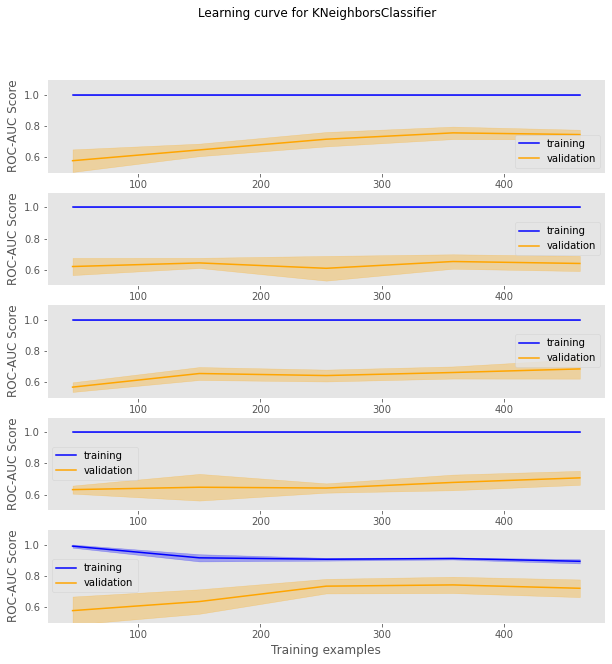

In [104]:
rs = StratifiedShuffleSplit(n_splits=N_SPLITS, test_size=.3, random_state=RANDOM_SEED)

scores_knn = {'f1': [], 'accuracy': [], 'AUC': []}
fitted_clf_list_knn = []

fig, axs = plt.subplots(N_SPLITS, figsize=(10, 10))

for i, (train_index, test_index) in enumerate(rs.split(X, y)):

    # Data split
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

    # Preprocessing
    scaler = StandardScaler()
    knn = KNeighborsClassifier()
    pca = PCA()
    selector = SelectKBest()

    # Pipeline
    pipe = Pipeline(steps=[('select', selector), ("knn", knn)])

    # Random grid:
    pca_components = [None] + list(np.arange(1, 101, 20))
    k_range = list(range(1, 31))
    weights = ['uniform', 'distance']
    k_select = np.arange(2, 150)

    random_grid = {'knn__n_neighbors': k_range,
    'knn__weights': weights,
    #'pca__n_components': pca_components}
    'select__k': k_select}

    # Hoeveel iteraties willen we?
    search = RandomizedSearchCV(pipe, random_grid, cv=3, scoring = 'f1', verbose=2, n_iter=20, random_state=RANDOM_SEED)
    search.fit(X_train, y_train)
    best_clf = search.best_estimator_
    fitted_clf_list_knn.append(search)
    
    # evaluation
    y_pred = best_clf.predict(X_test)
    y_score = best_clf.predict_proba(X_test)
    scores_knn['f1'] += [f1_score(y_test, y_pred)]
    scores_knn['accuracy'] += [accuracy_score(y_test, y_pred)]
    scores_knn['AUC'] += [roc_auc_score(y_test, y_score)]
    
    # Predictions
    scores_knn[f'probs_split_{i+1}'] = y_score
    scores_knn[f'labels_split_{i+1}'] = list(y_test)

    plot_learning_curve(best_clf, X_train, y_train, axs[i]) # eventueel testen met groot aantal neighbors
    fig.suptitle(f'Learning curve for {str(type(best_clf[-1])).split(".")[-1][:-2]}')
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END knn__n_neighbors=8, knn__weights=uniform, pca__n_components=81; total time=   0.5s
[CV] END knn__n_neighbors=8, knn__weights=uniform, pca__n_components=81; total time=   0.5s
[CV] END knn__n_neighbors=8, knn__weights=uniform, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=1, knn__weights=uniform, pca__n_components=61; total time=   0.6s
[CV] END knn__n_neighbors=1, knn__weights=uniform, pca__n_components=61; total time=   0.5s
[CV] END knn__n_neighbors=1, knn__weights=uniform, pca__n_components=61; total time=   0.5s
[CV] END knn__n_neighbors=11, knn__weights=uniform, pca__n_components=1; total time=   0.4s
[CV] END knn__n_neighbors=11, knn__weights=uniform, pca__n_components=1; total time=   0.4s
[CV] END knn__n_neighbors=11, knn__weights=uniform, pca__n_components=1; total time=   0.4s
[CV] END knn__n_neighbors=30, knn__weights=uniform, pca__n_components=21; total time=   0.4s
[CV] END knn__n_ne

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   19.0s finished


[CV] END knn__n_neighbors=13, knn__weights=distance, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=13, knn__weights=distance, pca__n_components=81; total time=   0.5s
[CV] END knn__n_neighbors=13, knn__weights=distance, pca__n_components=81; total time=   0.5s
[CV] END knn__n_neighbors=13, knn__weights=uniform, pca__n_components=61; total time=   0.5s
[CV] END knn__n_neighbors=13, knn__weights=uniform, pca__n_components=61; total time=   0.5s
[CV] END knn__n_neighbors=13, knn__weights=uniform, pca__n_components=61; total time=   0.6s
[CV] END knn__n_neighbors=9, knn__weights=uniform, pca__n_components=21; total time=   0.5s
[CV] END knn__n_neighbors=9, knn__weights=uniform, pca__n_components=21; total time=   0.5s
[CV] END knn__n_neighbors=9, knn__weights=uniform, pca__n_components=21; total time=   0.5s
[CV] END knn__n_neighbors=13, knn__weights=distance, pca__n_components=1; total time=   0.5s
[CV] END knn__n_neighbors=13, knn__weights=distance, pca__n_components

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   5.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   5.7s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   57.0s finished


[CV] END knn__n_neighbors=28, knn__weights=distance, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=28, knn__weights=distance, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=28, knn__weights=distance, pca__n_components=81; total time=   0.5s
[CV] END knn__n_neighbors=18, knn__weights=uniform, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=18, knn__weights=uniform, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=18, knn__weights=uniform, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=20, knn__weights=distance, pca__n_components=None; total time=   0.6s
[CV] END knn__n_neighbors=20, knn__weights=distance, pca__n_components=None; total time=   0.6s
[CV] END knn__n_neighbors=20, knn__weights=distance, pca__n_components=None; total time=   0.8s
[CV] END knn__n_neighbors=30, knn__weights=uniform, pca__n_components=None; total time=   1.0s
[CV] END knn__n_neighbors=30, knn__weights=uniform, pca_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   19.0s finished


[CV] END knn__n_neighbors=29, knn__weights=uniform, pca__n_components=81; total time=   0.7s
[CV] END knn__n_neighbors=29, knn__weights=uniform, pca__n_components=81; total time=   0.9s
[CV] END knn__n_neighbors=29, knn__weights=uniform, pca__n_components=81; total time=   0.8s
[CV] END knn__n_neighbors=1, knn__weights=distance, pca__n_components=None; total time=   1.0s
[CV] END knn__n_neighbors=1, knn__weights=distance, pca__n_components=None; total time=   0.9s
[CV] END knn__n_neighbors=1, knn__weights=distance, pca__n_components=None; total time=   0.8s
[CV] END knn__n_neighbors=23, knn__weights=uniform, pca__n_components=None; total time=   0.6s
[CV] END knn__n_neighbors=23, knn__weights=uniform, pca__n_components=None; total time=   0.6s
[CV] END knn__n_neighbors=23, knn__weights=uniform, pca__n_components=None; total time=   0.6s
[CV] END knn__n_neighbors=17, knn__weights=distance, pca__n_components=1; total time=   0.4s
[CV] END knn__n_neighbors=17, knn__weights=distance, pca__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   4.9s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   5.5s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.7s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   55.8s finished


[CV] END knn__n_neighbors=11, knn__weights=distance, pca__n_components=21; total time=   0.7s
[CV] END knn__n_neighbors=11, knn__weights=distance, pca__n_components=21; total time=   0.6s
[CV] END knn__n_neighbors=11, knn__weights=distance, pca__n_components=21; total time=   0.4s
[CV] END knn__n_neighbors=24, knn__weights=uniform, pca__n_components=None; total time=   0.9s
[CV] END knn__n_neighbors=24, knn__weights=uniform, pca__n_components=None; total time=   1.2s
[CV] END knn__n_neighbors=24, knn__weights=uniform, pca__n_components=None; total time=   1.1s
[CV] END knn__n_neighbors=27, knn__weights=uniform, pca__n_components=81; total time=   0.7s
[CV] END knn__n_neighbors=27, knn__weights=uniform, pca__n_components=81; total time=   0.6s
[CV] END knn__n_neighbors=27, knn__weights=uniform, pca__n_components=81; total time=   0.5s
[CV] END knn__n_neighbors=2, knn__weights=uniform, pca__n_components=1; total time=   0.3s
[CV] END knn__n_neighbors=2, knn__weights=uniform, pca__n_compo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.5s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   41.6s finished


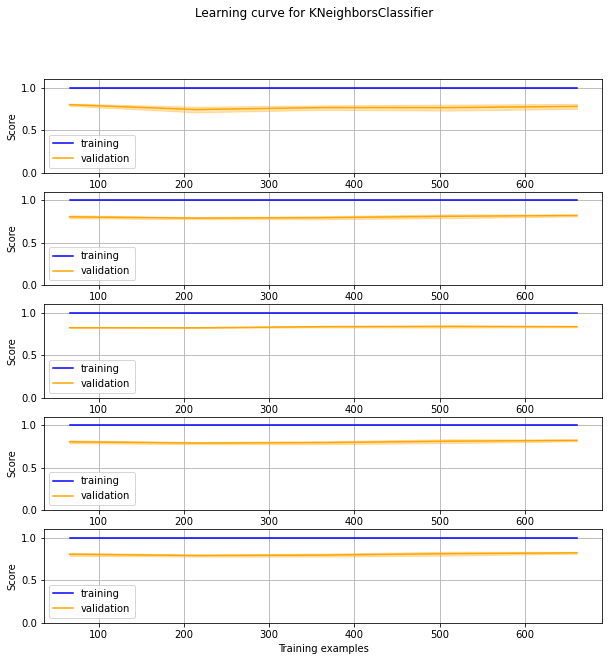

In [64]:
rs = StratifiedShuffleSplit(n_splits=N_SPLITS, test_size=.3, random_state=RANDOM_SEED)

scores_knn = {'f1': [], 'accuracy': [], 'AUC': []}
fitted_clf_list_knn = []

fig, axs = plt.subplots(N_SPLITS, figsize=(10, 10))

for i, (train_index, test_index) in enumerate(rs.split(X, y)):

    # Data split
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

    # Preprocessing
    scaler = StandardScaler()
    knn = KNeighborsClassifier()
    pca = PCA()
    selector = SelectKBest()

    # Pipeline
    pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ("knn", knn)])

    # GridSearch

    # Random grid:
    pca_components = [None] + list(np.arange(1, 101, 20))
    k_range = list(range(1, 31))
    weights = ['uniform', 'distance']
    k_select = np.arange(2, 150)

    random_grid = {'knn__n_neighbors': k_range,
    'knn__weights': weights,
    'pca__n_components': pca_components}
    #'select__k': k_select}

    # Hoeveel iteraties willen we?
    search = RandomizedSearchCV(pipe, random_grid, cv=3, scoring = 'f1', verbose=2, n_iter=20, random_state=RANDOM_SEED)
    search.fit(X_train, y_train)
    best_clf = search.best_estimator_
    fitted_clf_list_knn.append(search)
    
    # evaluation
    y_pred = best_clf.predict(X_test)
    scores_knn['f1'] += [f1_score(y_test, y_pred)]
    scores_knn['accuracy'] += [accuracy_score(y_test, y_pred)]
    scores_knn['AUC'] += [roc_auc_score(y_test, y_pred)]
    
    plot_learning_curve(best_clf, X_train, y_train, axs[i]) # eventueel testen met groot aantal neighbors
    fig.suptitle(f'Learning curve for {str(type(best_clf[-1])).split(".")[-1][:-2]}')
plt.show()

### Results - Overall metrics

In [69]:
print('F1-scores:')
print(f"{scores_knn['f1']}, mean: {np.mean(scores_knn['f1'])}")
print('Accuracy:')
print(f"{scores_knn['accuracy']}, mean: {np.mean(scores_knn['accuracy'])}")
print('AUC:')
print(f"{scores_knn['AUC']}, mean: {np.mean(scores_knn['AUC'])}")

F1-scores:
[0.3, 0.3157894736842105, 0.30508474576271183, 0.3333333333333333, 0.2857142857142857], mean: 0.3079843676989083
Accuracy:
[0.8313253012048193, 0.7911646586345381, 0.8353413654618473, 0.8232931726907631, 0.7991967871485943], mean: 0.8160642570281125
AUC:
[0.58519955654102, 0.5875831485587584, 0.5876385809312639, 0.598170731707317, 0.5746119733924613], mean: 0.5866407982261641


### Results - Hyperparameter search

In [66]:
import pandas as pd
for i, clf in enumerate(fitted_clf_list_knn): 
    print(f'Results for split {i+1}:')
    param_df = pd.DataFrame(clf.cv_results_)

    # columns to drop from dataframe:
    param_df = param_df.drop(['std_fit_time', 'mean_score_time', 'std_score_time'], axis=1)
    cols = [c for c in param_df.columns if c.lower()[:5] != 'split']
    
    param_df = param_df[cols].sort_values(by='rank_test_score')
    display(param_df.head(5))

Results for split 1:


,mean_fit_time,param_pca__n_components,param_knn__weights,param_knn__n_neighbors,params,mean_test_score,std_test_score,rank_test_score
1,0.500798,61,uniform,1,"{'pca__n_components': 61, 'knn__weights': 'uni...",0.279988,0.041973,1
8,0.466316,21,distance,7,"{'pca__n_components': 21, 'knn__weights': 'dis...",0.200193,0.065480,2
16,0.428787,1,distance,5,"{'pca__n_components': 1, 'knn__weights': 'dist...",0.186034,0.044580,3
4,0.444699,21,uniform,9,"{'pca__n_components': 21, 'knn__weights': 'uni...",0.172788,0.062008,4
19,0.666151,41,distance,8,"{'pca__n_components': 41, 'knn__weights': 'dis...",0.157149,0.081352,5


Results for split 2:


,mean_fit_time,param_pca__n_components,param_knn__weights,param_knn__n_neighbors,params,mean_test_score,std_test_score,rank_test_score
7,0.621605,None,distance,2,"{'pca__n_components': None, 'knn__weights': 'd...",0.306194,0.041172,1
5,0.500848,81,distance,2,"{'pca__n_components': 81, 'knn__weights': 'dis...",0.297562,0.008479,2
13,0.466448,21,distance,3,"{'pca__n_components': 21, 'knn__weights': 'dis...",0.192717,0.038087,3
9,0.460347,21,uniform,7,"{'pca__n_components': 21, 'knn__weights': 'uni...",0.168079,0.023059,4
16,0.437435,21,distance,10,"{'pca__n_components': 21, 'knn__weights': 'dis...",0.157895,0.000000,5


Results for split 3:


,mean_fit_time,param_pca__n_components,param_knn__weights,param_knn__n_neighbors,params,mean_test_score,std_test_score,rank_test_score
11,0.411546,21,distance,14,"{'pca__n_components': 21, 'knn__weights': 'dis...",0.203490,0.099414,1
15,0.455008,41,distance,7,"{'pca__n_components': 41, 'knn__weights': 'dis...",0.189409,0.038533,2
14,0.560355,81,distance,8,"{'pca__n_components': 81, 'knn__weights': 'dis...",0.174775,0.017837,3
7,0.403443,21,uniform,17,"{'pca__n_components': 21, 'knn__weights': 'uni...",0.169906,0.123294,4
9,0.363631,1,distance,4,"{'pca__n_components': 1, 'knn__weights': 'dist...",0.162363,0.036650,5


Results for split 4:


,mean_fit_time,param_pca__n_components,param_knn__weights,param_knn__n_neighbors,params,mean_test_score,std_test_score,rank_test_score
1,0.861248,None,distance,1,"{'pca__n_components': None, 'knn__weights': 'd...",0.245098,0.006932,1
12,0.484692,61,distance,4,"{'pca__n_components': 61, 'knn__weights': 'dis...",0.231389,0.077897,2
19,0.394789,1,distance,22,"{'pca__n_components': 1, 'knn__weights': 'dist...",0.144357,0.020527,3
3,0.370086,1,distance,17,"{'pca__n_components': 1, 'knn__weights': 'dist...",0.142818,0.022384,4
13,0.372126,1,uniform,5,"{'pca__n_components': 1, 'knn__weights': 'unif...",0.078419,0.043511,5


Results for split 5:


,mean_fit_time,param_pca__n_components,param_knn__weights,param_knn__n_neighbors,params,mean_test_score,std_test_score,rank_test_score
13,0.526756,None,uniform,1,"{'pca__n_components': None, 'knn__weights': 'u...",0.199289,0.094969,1
19,0.406564,41,distance,3,"{'pca__n_components': 41, 'knn__weights': 'dis...",0.158322,0.051972,2
4,0.319414,41,distance,7,"{'pca__n_components': 41, 'knn__weights': 'dis...",0.120273,0.059917,3
6,0.362715,61,distance,7,"{'pca__n_components': 61, 'knn__weights': 'dis...",0.118647,0.057758,4
14,0.341981,1,distance,8,"{'pca__n_components': 1, 'knn__weights': 'dist...",0.100516,0.062464,5


# SVM

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END pca__n_components=61, svm__C=35.01, svm__gamma=0.451, svm__kernel=linear;, score=0.429 total time=  29.8s
[CV 2/3] END pca__n_components=61, svm__C=35.01, svm__gamma=0.451, svm__kernel=linear;, score=0.417 total time=  18.9s
[CV 3/3] END pca__n_components=61, svm__C=35.01, svm__gamma=0.451, svm__kernel=linear;, score=0.386 total time=  54.5s
[CV 1/3] END pca__n_components=61, svm__C=70.01, svm__gamma=0.6010000000000001, svm__kernel=rbf;, score=0.000 total time=   0.5s
[CV 2/3] END pca__n_components=61, svm__C=70.01, svm__gamma=0.6010000000000001, svm__kernel=rbf;, score=0.000 total time=   0.5s
[CV 3/3] END pca__n_components=61, svm__C=70.01, svm__gamma=0.6010000000000001, svm__kernel=rbf;, score=0.000 total time=   0.5s
[CV 1/3] END pca__n_components=81, svm__C=40.01, svm__gamma=0.101, svm__kernel=rbf;, score=0.000 total time=   0.5s
[CV 2/3] END pca__n_components=81, svm__C=40.01, svm__gamma=0.101, svm__kernel=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   7.1s
[CV] END .................................................... total time=  36.0s
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 2.0min
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=  10.7s
[CV] END .................................................... total time=  43.4s
[CV] END .................................................... total time=  49.2s
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   4.8s
[CV] END .................................................... total time=  46.3s
[CV] END ...................

KeyboardInterrupt: 

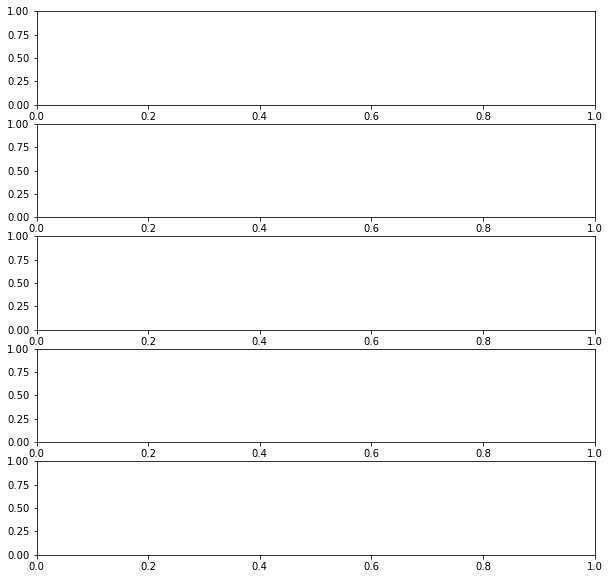

In [93]:

# Aantal splits
N_SPLITS = 5

rs = StratifiedShuffleSplit(n_splits=N_SPLITS, test_size=.3)

scores_svm = {'f1': [], 'accuracy': [], 'AUC': []}
fitted_clf_list_svm = []

fig, axs = plt.subplots(N_SPLITS, figsize=(10, 10))

for i, (train_index, test_index) in enumerate(rs.split(X, y)):

    # Data split
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]

    # Preprocessing
    scaler = StandardScaler()
    pca = PCA()

    # classifier 
    classifier = svm.SVC()
    # Pipeline
    pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svm', classifier)])

    # GridSearch

    # Random grid:
    random_grid = {
        #'pca__n_components': [None, 10,50,100],
            'svm__C': list(np.arange(0.01,100, 5)),
            'svm__gamma': list(np.arange(0.001, 1, 0.05)), 
            'svm__kernel': ['rbf', 'poly', 'linear'],
            'pca__n_components': [None] + list(np.arange(1, 101, 20))} 


    search = RandomizedSearchCV(pipe, random_grid, cv=3, verbose=5, scoring = 'f1', n_iter= 20)
    search.fit(X_train, y_train)
    best_clf = search.best_estimator_
    fitted_clf_list_svm.append(search)

    # evaluation
    y_pred = best_clf.predict(X_test)
    y_score = best_clf.predict_proba(X_test)
    scores_svm['f1'] += [f1_score(y_test, y_pred)]
    scores_svm['accuracy'] += [accuracy_score(y_test, y_pred)]
    scores_svm['AUC'] += [roc_auc_score(y_test, y_score)]

    # Predictions
    scores_svm[f'probs_split_{i+1}'] = y_score
    scores_svm[f'labels_split_{i+1}'] = list(y_test)
    
    plot_learning_curve(best_clf, X_train, y_train, axs[i])
    fig.suptitle(f'Learning curve for {str(type(best_clf[-1])).split(".")[-1][:-2]}')
plt.show()

### Results - Overall metrics

In [ ]:
print('F1-scores:')
print(f"{scores_svm['f1']}, mean: {np.mean(scores_svm['f1'])}")
print('Accuracy:')
print(f"{scores_svm['accuracy']}, mean: {np.mean(scores_svm['accuracy'])}")
print('AUC:')
print(f"{scores_svm['AUC']}, mean: {np.mean(scores_svm['AUC'])}")

### Results - Hyperparameter search

In [ ]:
import pandas as pd
for i, clf in enumerate(fitted_clf_list_svm): 
    print(f'Results for split {i+1}:')
    param_df = pd.DataFrame(clf.cv_results_)

    # columns to drop from dataframe:
    param_df = param_df.drop(['std_fit_time', 'mean_score_time', 'std_score_time'], axis=1)
    cols = [c for c in param_df.columns if c.lower()[:5] != 'split']
    
    param_df = param_df[cols].sort_values(by='rank_test_score')
    display(param_df.head(5))

# Statistical analysis

### Create table of p-values (significant values are green)

In [83]:
classifiers_used = ['Random Forest', 'K-NN', 'Naive Bayes'] # SVM toevoegen

names = combinations(classifiers_used, 2)
#comb = combinations([scores_rf['f1'], scores_knn['f1'], scores_nb['f1'], scores_svm['f1']], 2)

# Terugveranderen!
scores_rf = [0.25925925925925924, 0.37931034482758624, 0.18518518518518517, 0.1923076923076923, 0.22222222222222218]
scores_knn = [0.3, 0.3157894736842105, 0.30508474576271183, 0.3333333333333333, 0.2857142857142857]
scores_nb = [0.30769230769230765, 0.41666666666666663, 0.34375, 0.4266666666666667, 0.3684210526315789]
#scores_svm = []

comb = combinations([scores_rf, scores_knn, scores_nb], 2)
 
# Print the obtained combinations
p_values_table = pd.DataFrame(index=classifiers_used, columns=classifiers_used)

for name, scores in zip(list(names), list(comb)):
    _, p_value = ttest_rel(scores[0], scores[1])
    p_values_table[name[0]][name[1]] = p_value
    p_values_table[name[1]][name[0]] = p_value

In [81]:
def _color_green(val):
    color = 'grey' if val == '-' else ('green' if float(val) < 0.05 else 'black')
    return 'color: %s' % color

In [82]:
p_values_table = p_values_table.replace(pd.NA, '-')
p_values_table = p_values_table.style.applymap(_color_green)
display(p_values_table)

,Random Forest,K-NN,Naive Bayes
Random Forest,-,0.168279,0.027363
K-NN,0.168279,-,0.022361
Naive Bayes,0.027363,0.022361,-


#### Boxplot for F1-scores of the different ML algorithms used

Text(0, 0.5, 'F1-score')

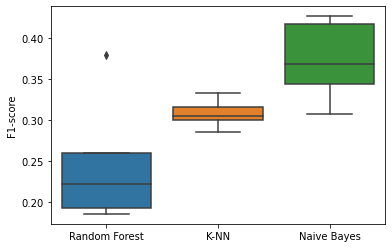

In [17]:
scores_df = pd.DataFrame({'Random Forest': scores_rf, 'K-NN': scores_knn, 'Naive Bayes': scores_nb})

ax = seaborn.boxplot(data=scores_df)
ax.set_ylabel('F1-score')

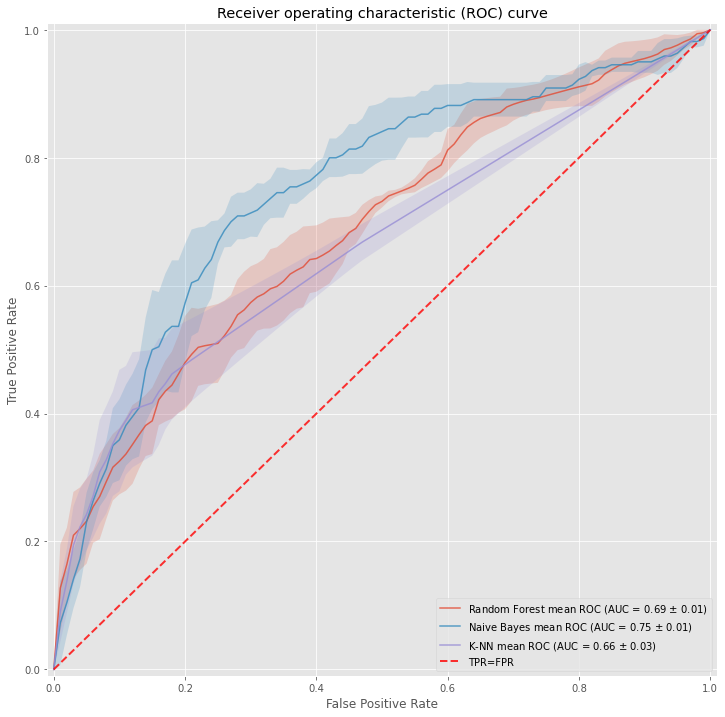

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from sklearn.metrics import roc_curve, auc
from itertools import cycle
plt.style.use('ggplot')

scores_dict = [scores_rf, scores_nb, scores_knn]
classifiers_used = ['Random Forest', 'Naive Bayes', 'K-NN']

colors = ['darksalmon', 'gold', 'royalblue', 'mediumseagreen', 'violet']
plt.figure(figsize=(12, 12))

for dict, name in zip(scores_dict, classifiers_used):
    tprs = []
    aucs = []
    base_fpr = np.linspace(0, 1, 101)

    for i in range(N_SPLITS):
        fpr, tpr, _ = roc_curve(dict[f'labels_split_{i+1}'], dict[f'probs_split_{i+1}'][:, 1])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tpr = np.interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        tprs.append(tpr)

    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)

    mean_auc = auc(base_fpr, mean_tprs)
    std_auc = np.std(aucs)

    tprs_upper = np.minimum(mean_tprs + std, 1)
    tprs_lower = mean_tprs - std

    plt.plot(base_fpr, mean_tprs, alpha = 0.8, label=r'%s mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (name, mean_auc, std_auc),)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, alpha = 0.2)

plt.plot([0, 1], [0, 1], linestyle = '--', lw = 2, color = 'r', label = 'TPR=FPR', alpha= 0.8)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.title('Receiver operating characteristic (ROC) curve')
plt.show()

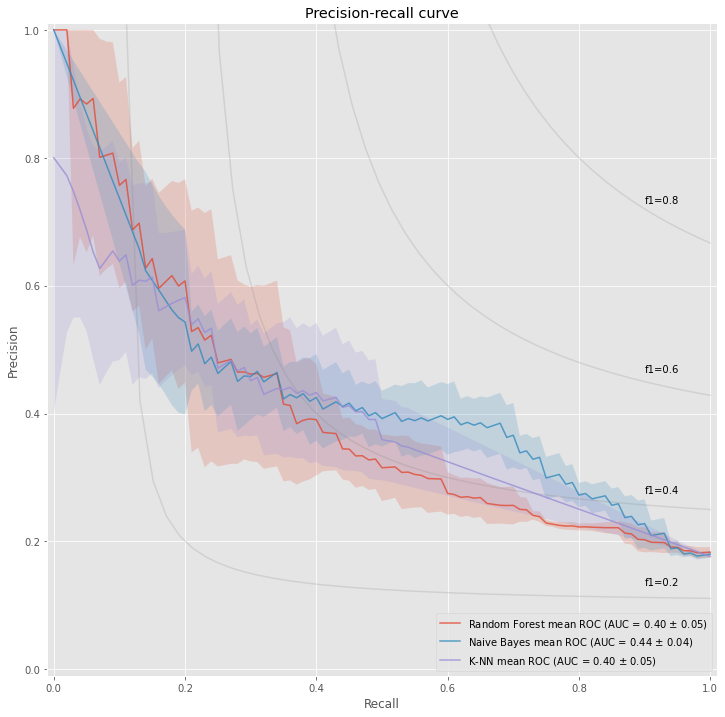

In [108]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

plt.style.use('ggplot')

plt.figure(figsize=(12, 12))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

for dict, name in zip(scores_dict, classifiers_used):
    precision = []
    pr_auc = []
    base_recall = np.linspace(0, 1, 101)

    for i in range(N_SPLITS):
        prec, rec, _ = precision_recall_curve(dict[f'labels_split_{i+1}'], dict[f'probs_split_{i+1}'][:, 1])
        prec = np.flip(prec)
        rec = np.flip(rec)
        auc_temp = auc(rec, prec)
        pr_auc.append(auc_temp)
        prec = np.interp(base_recall, rec, prec)
        precision.append(prec)

    precision = np.array(precision)
    mean_precisions = np.mean(precision, axis=0)
    std = precision.std(axis=0)

    mean_auc = np.mean(pr_auc)
    std_auc = np.std(pr_auc)

    plt.plot(base_recall, mean_precisions, alpha = 0.8, label=r'%s mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (name, mean_auc, std_auc),)
    

    prec_upper = np.minimum(mean_precisions + std, 1)
    prec_lower = mean_precisions - std
    plt.fill_between(base_recall, prec_lower, prec_upper, alpha = 0.2)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc="lower right")
plt.title('Precision-recall curve')
plt.show()